# ESTUDO DE DATA SCIENCE
### Estudo de web scraping e Data Science com base nos episódios de Brooklyn 99. Mais análises disponíveis no Readme.md
##### O Código foi adaptado do trabalho original de estudo em cima da Série 'The Office'  por @CesarGaglioni disponível em https://github.com/cesargaglioni/TheOfficeIMDB

In [33]:
# O código foi desenvolvido inteiro em um Jupyter Notebook configurado com Python 3.9, portanto, é possível que o requirements.txt contenha diversos pacotes não utilizados para essa análise. As únicas instalações efetuadas estão na célula abaixo

In [56]:
# Importando as bibliotecas necessárias
!pip install -U scikit-learn
!pip install dataframe_image
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

     ---------------------------------------- 6.6/6.6 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 323.5/323.5 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.0.1
    Uninstalling charset-normalizer-3.0.1:
      Successfully uninstalled charset-normalizer-3.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\farin\\anaconda3\\envs\\alura_pandas\\Lib\\site-packages\\~harset_normalizer\\md.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Início da raspagem de dados

In [35]:
# Iniciando a raspagem, caso queira alterar o show, é só alterar os dados da URL
# Essa raspagem inicial valida o funcionamento do método get()

url = 'https://www.imdb.com/title/tt2467372/episodes?season=1' #BROOKLYN NINE-NINE
response = get(url)
print(response.text[:250])


 










<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         

        <meta charset="utf-8">




        <script type="text/javascript">var IMDbTimer={starttime: new Date()


In [36]:
# Fazendo o Parse dos dados
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)


bs4.BeautifulSoup

In [37]:
# Mapeando os elementos HTML
episode_containers = html_soup.find_all('div', class_='info')
episode_containers[0].a['title']
episode_containers[0].meta['content']
episode_containers[0].find('div', class_='airdate').text.strip()
episode_containers[0].find('div', class_='ipl-rating-star__rating')
episode_containers[0].find('span', class_='ipl-rating-star__total-votes').text
episode_containers[0].find('div', class_='item_description').text.strip()

'Detective Jake Peralta finds his work scrutinized when new Captain, Ray Holt, takes over at his precinct.'

In [38]:
# Loops


b99_episodes = []

# Passando pelas páginas
for sn in range(1,9):
    # Request from the server the content of the web page by using get(), and store the server’s response in the variable response
    response = get('https://www.imdb.com/title/tt2467372/episodes?season=' + str(sn))

    # Parsing
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # Detalhes dos episódios
    for episodes in episode_containers:
            # Pegando os dados de cada episódio
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compilando os dados de cada episódio
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Inserindo os dados no dataset
            b99_episodes.append(episode_data)

  



In [39]:
# Criando o DataFrame
b99_episodes = pd.DataFrame(b99_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])

b99_episodes.head(10)

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,17 Sep. 2013,7.7,"(5,300)",Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,24 Sep. 2013,7.5,"(4,335)","When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,1 Oct. 2013,7.5,"(4,065)","With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,8 Oct. 2013,7.6,"(3,929)","Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,15 Oct. 2013,7.9,"(3,809)",A detective from Major Crimes takes over Jake'...
5,1,6,Halloween,22 Oct. 2013,8.4,"(4,266)",Jake makes a foolish bet with Holt that he can...
6,1,7,48 Hours,5 Nov. 2013,8.0,"(3,739)",Jake stupidly arrests a male suspect despite h...
7,1,8,Old School,12 Nov. 2013,7.6,"(3,589)","Jake is horrified when his hero, Jimmy Brogan,..."
8,1,9,Sal's Pizza,19 Nov. 2013,7.5,"(3,517)",Jake's favorite pizza place burns down and he ...
9,1,10,Thanksgiving,26 Nov. 2013,8.1,"(3,603)",Amy hosts a Thanksgiving dinner at her apartme...


In [40]:
# Limpando os dados

# Transformando o string de total de votos em número
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes
b99_episodes['total_votes'] = b99_episodes.total_votes.apply(remove_str).astype(int)
b99_episodes.head()

# Transformando o string de rating em número
b99_episodes['rating'] = b99_episodes.rating.astype(float)

# Transformando o string de data em datetime
b99_episodes['airdate'] = pd.to_datetime(b99_episodes.airdate)

b99_episodes.info()
b99_episodes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          153 non-null    int64         
 1   episode_number  153 non-null    object        
 2   title           153 non-null    object        
 3   airdate         153 non-null    datetime64[ns]
 4   rating          153 non-null    float64       
 5   total_votes     153 non-null    int32         
 6   desc            153 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 7.9+ KB


,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2013-09-17,7.7,5300,Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,2013-09-24,7.5,4335,"When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,2013-10-01,7.5,4065,"With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,2013-10-08,7.6,3929,"Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,2013-10-15,7.9,3809,A detective from Major Crimes takes over Jake'...


In [41]:
# Salvando o CSV
dados_serie = b99_episodes.to_csv('B99_IMDB.csv',index=False)

# Regressão Linear

In [42]:
# Regressão linear
dados = pd.read_csv('B99_IMDB.csv')
print(dados.head(1))

   season  episode_number  title     airdate  rating  total_votes  \
0       1               1  Pilot  2013-09-17     7.7         5300   

                                                desc  
0  Detective Jake Peralta finds his work scrutini...  


In [43]:
# Regressão Linear 2
X = dados.iloc[:, 5].values.reshape(-1, 1) 
Y = dados.iloc[:, 4].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X) 

r2 = linear_regressor.score(X,Y)
print("Coeficiente de determinação = ",r2)

Coeficiente de determinação =  0.01666080650419277


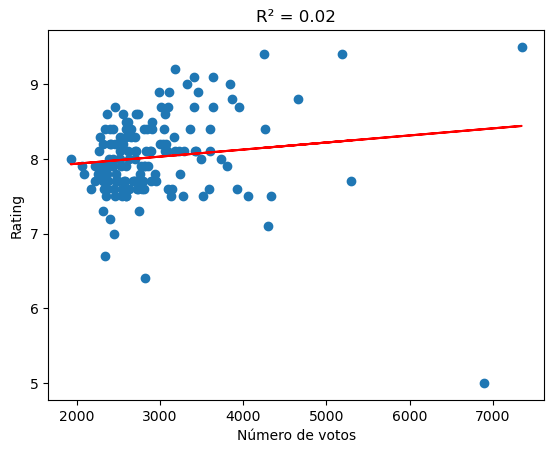

In [44]:
# Gráfico da regressão linear
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.suptitle(dados_serie)
plt.title("R² = "+ "{:.2f}".format(r2))
plt.xlabel('Número de votos') 
plt.ylabel('Rating') 
plt.savefig(" Regression.jpeg")
plt.show()

# Análise Exploratória

In [45]:
df = pd.read_csv('B99_IMDB.csv')
df.head()
df.describe()

,season,episode_number,rating,total_votes
count,153.000000,153.000000,153.000000,153.000000
mean,4.013072,10.640523,8.023529,2927.313725
std,2.121280,6.294959,0.559107,762.475655
min,1.000000,1.000000,5.000000,1930.000000
25%,2.000000,5.000000,7.700000,2454.000000
50%,4.000000,10.000000,8.000000,2719.000000
75%,6.000000,16.000000,8.400000,3131.000000
max,8.000000,23.000000,9.500000,7346.000000


In [46]:
# Dados por temporada
df.groupby('season').describe()

episode_number                                               rating  \
                count  mean       std  min   25%   50%    75%   max  count   
season                                                                       
1                22.0  11.5  6.493587  1.0  6.25  11.5  16.75  22.0   22.0   
2                23.0  12.0  6.782330  1.0  6.50  12.0  17.50  23.0   23.0   
3                23.0  12.0  6.782330  1.0  6.50  12.0  17.50  23.0   23.0   
4                22.0  11.5  6.493587  1.0  6.25  11.5  16.75  22.0   22.0   
5                22.0  11.5  6.493587  1.0  6.25  11.5  16.75  22.0   22.0   
6                18.0   9.5  5.338539  1.0  5.25   9.5  13.75  18.0   18.0   
7                13.0   7.0  3.894440  1.0  4.00   7.0  10.00  13.0   13.0   
8                10.0   5.5  3.027650  1.0  3.25   5.5   7.75  10.0   10.0   

                  ...             total_votes                            \
            mean  ...    75%  max       count         mean          std   
season            ...                                                     
1       7.945455  ...  8.100  8.8        22.0  3694.636364   498.714590   
2       8.021739  ...  8.100  9.0        23.0  3018.782609   272.894245   
3       8.000000  ...  8.150  8.9        23.0  2742.869565   244.680739   
4       8.072727  ...  8.375  8.8        22.0  2615.590909   492.610892   
5       8.222727  ...  8.400  9.5        22.0  2908.636364  1182.760957   
6       7.955556  ...  8.375  9.0        18.0  2794.444444   506.927796   
7       8.184615  ...  8.600  9.1        13.0  2456.461538   320.849294   
8       7.620000  ...  7.975  9.4        10.0  3031.200000  1517.706808   

                                                  
           min      25%     50%      75%     max  
season                                            
1       3131.0  3380.50  3594.0  3915.00  5300.0  
2       2733.0  2844.00  2948.0  3085.50  3848.0  
3       2454.0  2571.50  2700.0  2794.50  3458.0  
4       2290.0  2375.00  2467.0  2615.25  4655.0  
5       2224.0  2364.75  2460.0  2819.50  7346.0  
6       2257.0  2516.75  2643.5  2950.25  4304.0  
7       2093.0  2280.00  2399.0  2530.00  3410.0  
8       1930.0  2201.25  2400.0  3071.75  6889.0  

[8 rows x 24 columns]

In [47]:
# Os piores episódios
df.sort_values('rating').head(10)
piores_episodios = df.sort_values('rating').head(10)
piores_episodios

,season,episode_number,title,airdate,rating,total_votes,desc
143,8,1,The Good Ones,2021-08-12,5.0,6889,Amy returns from maternity leave; Jake and Ros...
126,6,15,Return of the King,2019-05-02,6.4,2819,"When Gina returns to the Nine-Nine, Jake and T..."
148,8,6,The Set Up,2021-08-26,6.7,2348,"When the FBI takes over a high-profile case, J..."
145,8,3,Blue Flu,2021-08-19,7.0,2452,Captain Holt and Amy manage an understaffed pr...
119,6,8,"He Said, She Said",2019-02-28,7.1,4304,"Jake and Amy investigate a difficult ""he said,..."
134,7,5,Debbie,2020-02-27,7.2,2399,When cocaine and weapons are stolen from the e...
115,6,4,Four Movements,2019-01-31,7.3,2756,Gina plays a high-stakes game of chess with Ca...
121,6,10,Gintars,2019-03-14,7.3,2321,A visitor from Latvia causes Charles and Jake ...
71,4,4,The Night Shift,2016-10-11,7.5,2591,"Jake, on his first case back at the precinct, ..."
114,6,3,The Tattler,2019-01-24,7.5,2542,Jake and Gina attend their 20th high school re...


In [79]:
# Os melhores episódios
df.sort_values('rating',ascending=False).head(10)
melhores_episodios = df.sort_values('rating',ascending=False).head(10)
melhores_episodios

,season,episode_number,title,airdate,rating,total_votes,desc
103,5,14,The Box,2018-04-01,9.5,7346,Jake and Holt spend all night trying to get a ...
152,8,10,The Last Day Pt 2,2021-09-16,9.4,4254,The squad takes stock of their eight years tog...
93,5,4,HalloVeen,2017-10-17,9.4,5189,The Nine-Nine has their fifth annual Halloween...
151,8,9,The Last Day Pt 1,2021-09-16,9.2,3185,The squad takes stock of their eight years tog...
142,7,13,Lights Out,2020-04-23,9.1,3410,The entire squad is on high alert when a massi...
111,5,22,Jake & Amy,2018-05-20,9.1,3637,The squad rushes to save Jake and Amy's weddin...
127,6,16,Cinco de Mayo,2019-05-09,9.0,3325,In order to distract Terry from the stress of ...
44,2,23,Johnny and Dora,2015-05-17,9.0,3848,When Jake and Amy go under cover to catch an i...
49,3,5,Halloween III,2015-10-25,8.9,3458,"For this year's Halloween challenge, Jake and ..."
129,6,18,Suicide Squad,2019-05-16,8.9,2994,Desperate circumstances call for desperate mea...


In [99]:
# Nota média por temporada
Nota_Temporada = df.groupby('season').mean()['rating'].round(2)
Nota_Temporada

C:\Users\farin\AppData\Local\Temp\ipykernel_9768\1438004739.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nota_Temporada = df.groupby('season').mean()['rating'].round(2)


season
1    7.95
2    8.02
3    8.00
4    8.07
5    8.22
6    7.96
7    8.18
8    7.62
Name: rating, dtype: float64

<AxesSubplot: xlabel='rating', ylabel='total_votes'>

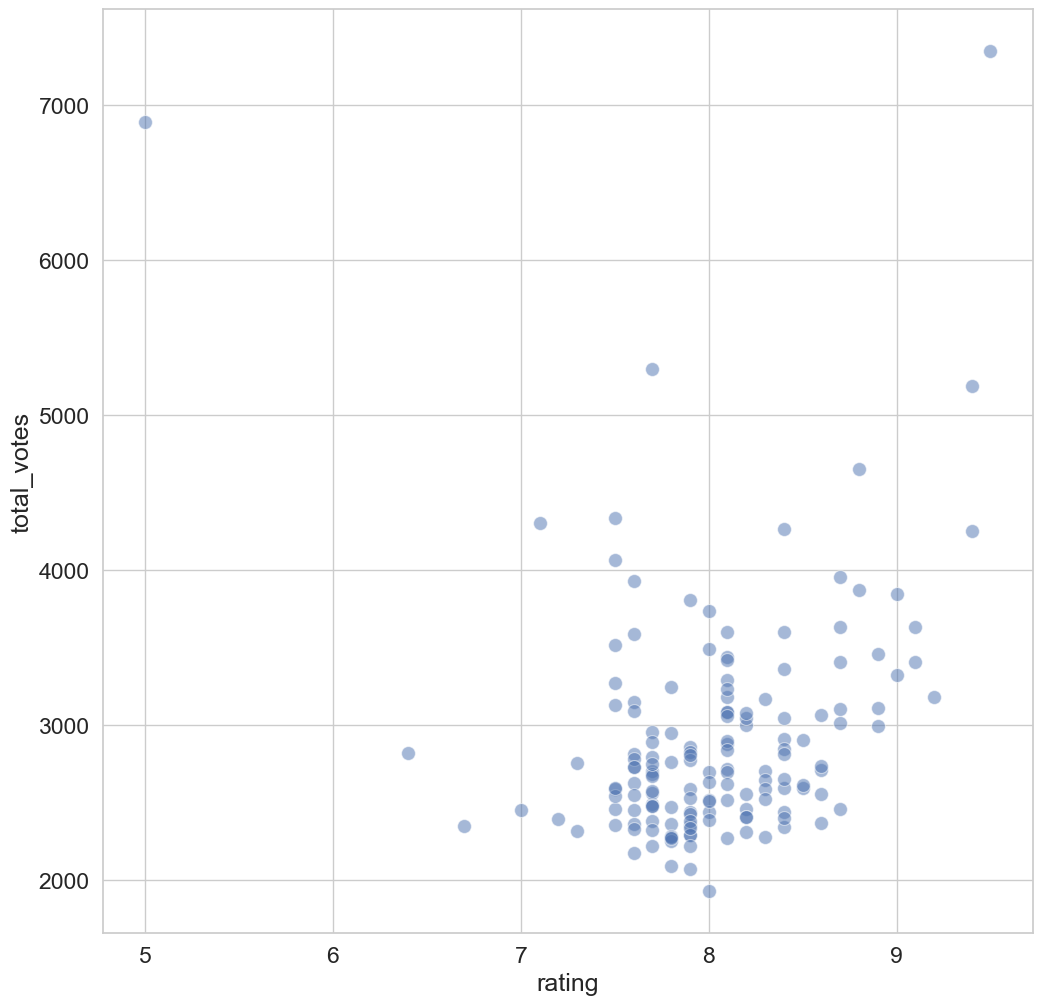

In [50]:
# Gráfico de relação entre rating e total de votos
sns.set(font_scale=1.5,style='whitegrid')
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.rating,y=df.total_votes,alpha=0.5,s=100)

In [51]:
# Preparando os dados para o heat map

df_heat = pd.pivot_table(data=df,index=['season'],columns=['episode_number'],values=['rating'])

# Preparando as labels
episodenum = [*range(1,24)]
episodenum = [str(x) for x in episodenum]
episodenum
seasonticks = [*range(1,9)]
seasonticks = ['Temporada '+str(x) for x in seasonticks]
seasonticks

['Temporada 1',
 'Temporada 2',
 'Temporada 3',
 'Temporada 4',
 'Temporada 5',
 'Temporada 6',
 'Temporada 7',
 'Temporada 8']

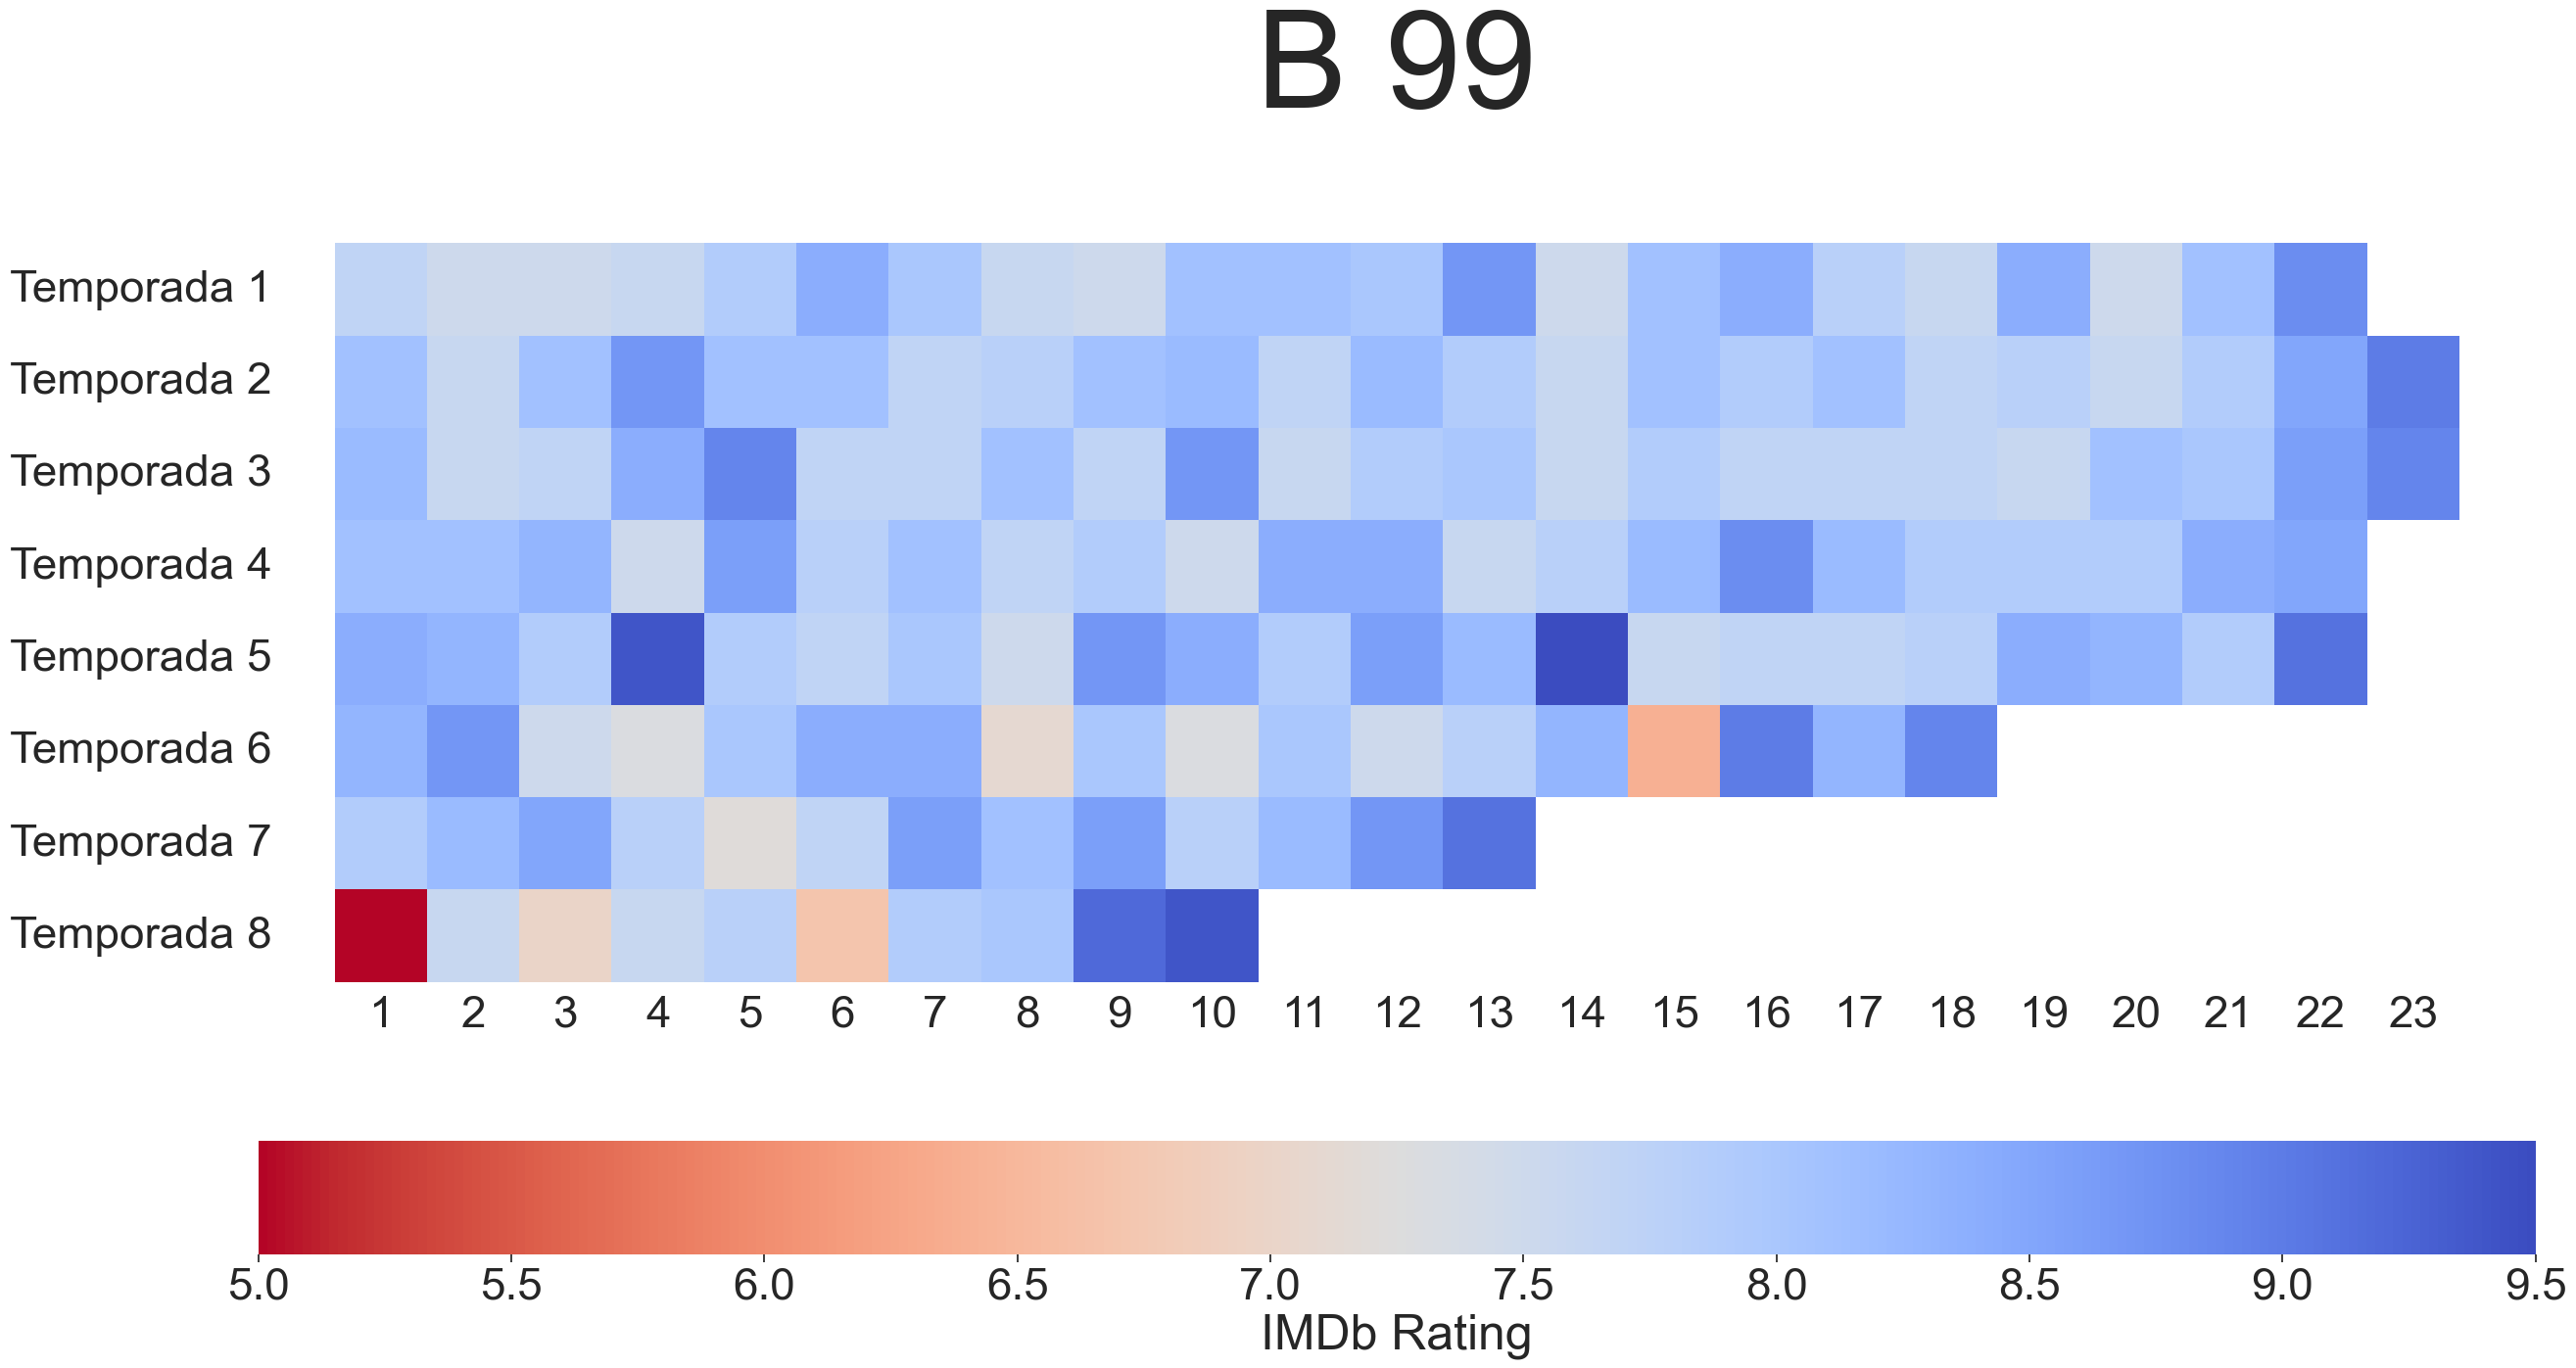

In [52]:
# Criando o gráfico
sns.set(font_scale=3,style='whitegrid')
plt.figure(figsize=(30,14))
fg = sns.heatmap(df_heat,cmap='coolwarm_r', cbar_kws={'orientation': 'horizontal', 'label': 'IMDb Rating'}, square=True, xticklabels = episodenum, yticklabels = seasonticks)

# Colocando o eixo x no topo
# fg.xaxis.tick_top()
# fg.set_xticklabels(episodenum,fontsize=30)
# fg.set_yticklabels(seasonticks, rotation=360, horizontalalignment='right',fontsize=30)
# Adicionando mais espaço
fg.tick_params(axis='y', which='major', pad=40)
fg.set_ylabel('')    
fg.set_xlabel('')
fg.set_title('B 99',fontsize=100,pad=100)

plt.show()

In [53]:
# Salvando o gráfico
fig = fg.get_figure()
fig.savefig('Ratings_episodios.png',dpi=200)

In [59]:
!pip install dataframe_image
import dataframe_image as dfi

  Using cached dataframe_image-0.1.5-py3-none-any.whl (6.6 MB)
  Using cached aiohttp-3.8.3-cp39-cp39-win_amd64.whl (323 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached yarl-1.8.2-cp39-cp39-win_amd64.whl (56 kB)


In [94]:
index_novo = list(range(1,11))
index_novo


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [93]:
melhores_episodios.rename(columns={'season':'Temporada','episode_number':'Episódio','title':'Título','airdate':'Data de Exibição', 'rating':'Nota','total_votes':'Votos Totais','desc':'Descrição'},
                          
                          inplace=True)
melhores_episodios.rename_axis('#',
                              inplace=True)
melhores_episodios.index = index_novo
melhores_episodios

,Temporada,Episódio,Título,Data de Exibição,Nota,Votos Totais,Descrição
1,5,14,The Box,2018-04-01,9.5,7346,Jake and Holt spend all night trying to get a ...
2,8,10,The Last Day Pt 2,2021-09-16,9.4,4254,The squad takes stock of their eight years tog...
3,5,4,HalloVeen,2017-10-17,9.4,5189,The Nine-Nine has their fifth annual Halloween...
4,8,9,The Last Day Pt 1,2021-09-16,9.2,3185,The squad takes stock of their eight years tog...
5,7,13,Lights Out,2020-04-23,9.1,3410,The entire squad is on high alert when a massi...
6,5,22,Jake & Amy,2018-05-20,9.1,3637,The squad rushes to save Jake and Amy's weddin...
7,6,16,Cinco de Mayo,2019-05-09,9.0,3325,In order to distract Terry from the stress of ...
8,2,23,Johnny and Dora,2015-05-17,9.0,3848,When Jake and Amy go under cover to catch an i...
9,3,5,Halloween III,2015-10-25,8.9,3458,"For this year's Halloween challenge, Jake and ..."
10,6,18,Suicide Squad,2019-05-16,8.9,2994,Desperate circumstances call for desperate mea...


In [95]:
dfi.export(melhores_episodios,"Melhores_Episodios.png")

In [97]:
piores_episodios.rename(columns={'season':'Temporada','episode_number':'Episódio','title':'Título','airdate':'Data de Exibição', 'rating':'Nota','total_votes':'Votos Totais','desc':'Descrição'},
                          inplace=True)
piores_episodios.rename_axis('#',
                            inplace=True)
piores_episodios.index = index_novo
piores_episodios

,Temporada,Episódio,Título,Data de Exibição,Nota,Votos Totais,Descrição
1,8,1,The Good Ones,2021-08-12,5.0,6889,Amy returns from maternity leave; Jake and Ros...
2,6,15,Return of the King,2019-05-02,6.4,2819,"When Gina returns to the Nine-Nine, Jake and T..."
3,8,6,The Set Up,2021-08-26,6.7,2348,"When the FBI takes over a high-profile case, J..."
4,8,3,Blue Flu,2021-08-19,7.0,2452,Captain Holt and Amy manage an understaffed pr...
5,6,8,"He Said, She Said",2019-02-28,7.1,4304,"Jake and Amy investigate a difficult ""he said,..."
6,7,5,Debbie,2020-02-27,7.2,2399,When cocaine and weapons are stolen from the e...
7,6,4,Four Movements,2019-01-31,7.3,2756,Gina plays a high-stakes game of chess with Ca...
8,6,10,Gintars,2019-03-14,7.3,2321,A visitor from Latvia causes Charles and Jake ...
9,4,4,The Night Shift,2016-10-11,7.5,2591,"Jake, on his first case back at the precinct, ..."
10,6,3,The Tattler,2019-01-24,7.5,2542,Jake and Gina attend their 20th high school re...


In [98]:
dfi.export(piores_episodios,"Piores_Episodios.png")